In [1]:
#курьеры могут отвести последний заказ по пути домой
#две группы : с и без этой новой фичи

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [3]:
pizza = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kornilova-25/My_Projects/experiment_lesson_4.csv')
pizza.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [4]:
pizza.groupby('experiment_group').agg({'order_id':'count'})

,order_id
experiment_group,
control,10092
test,10104


district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

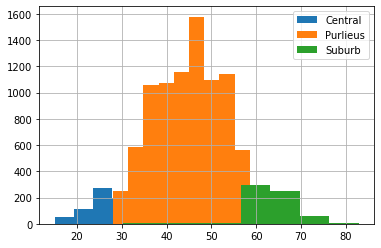

In [5]:
control_delivery_time_by_district = pizza.query('experiment_group=="control"').groupby('district').delivery_time
control_delivery_time_by_district.hist(legend=True)

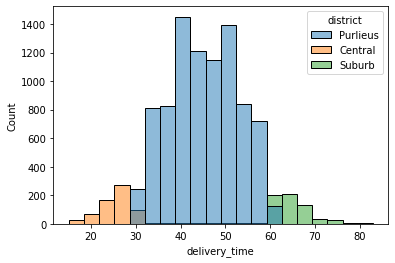

In [6]:
sns.histplot(data=pizza.query('experiment_group == "control"'), x='delivery_time', bins=20, hue='district')
#2 метод

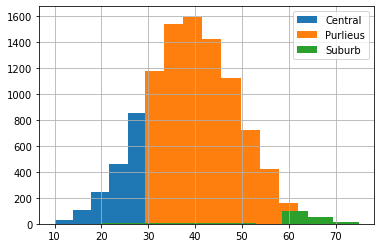

In [7]:
test_delivery_time_by_district = pizza.query('experiment_group=="test"').groupby('district').delivery_time.hist(legend=True)

In [8]:
#проверка на нормальность

In [9]:
ss.normaltest(pizza.query('experiment_group=="test"').delivery_time) #отклоняем гипотезу о нормальности

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [10]:
ss.normaltest(pizza.query('experiment_group=="control"').delivery_time) #сохраняем гипотезу о нормальности

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [11]:
#средние времена доставки

In [28]:
mean_test = pizza.query('experiment_group=="test"').delivery_time.mean()

In [19]:
pizza.query('experiment_group=="test"').delivery_time.std().round(2)

9.88

In [29]:
mean_control = pizza.query('experiment_group=="control"').delivery_time.mean()

In [21]:
pizza.query('experiment_group=="control"').delivery_time.std().round(2)

9.99

In [30]:
round((mean_control - mean_test)*100/mean_control,2)

13.35

т е среднее время доставки уменьшилось на 13%

In [16]:
#сравниваем средние t тестом

In [17]:
ss.ttest_ind(pizza.query('experiment_group=="control"').delivery_time,pizza.query('experiment_group=="test"').delivery_time )

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

In [ ]:
#т е разница средних случайна с вероятностью 0